In [2]:
# 多层感知机并实现 MNIST 分类
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

将输入的 MNIST 图像数据转换为 PyTorch 张量

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1,), (0.3,))
])

In [7]:
# 加载MNIST数据集
train_dataset = datasets.MNIST(root='/home/panix/Documents/Pycharm/DeepLearning/data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='/home/panix/Documents/Pycharm/DeepLearning/data', train=False, download=True, transform=transform)
print("train_dataset:", train_dataset)
# print(train_dataset.data)
print("train_dataset.data.shape:", train_dataset.data.shape)  # torch.Size([60000, 28, 28])

train_dataset: Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/panix/Documents/Pycharm/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
train_dataset.data.shape: torch.Size([60000, 28, 28])


Image shape: torch.Size([1, 28, 28])


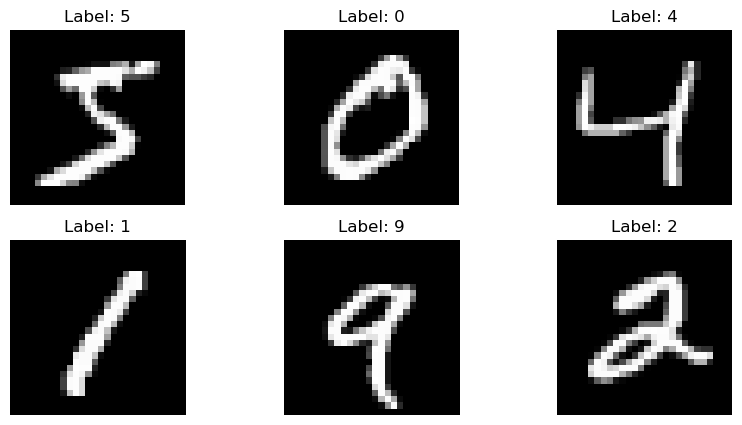

In [9]:
# 单张图片
# image_data, label = train_dataset[0]
# print(train_dataset[0])
# image_data=train_dataset[0][0], label = train_dataset[0][1]
# print("Image shape:", image_data[0].shape)
images, labels = zip(*[train_dataset[i] for i in range(6)])
print("Image shape:", images[0].shape)
# 创建一个包含6个子图的网格
fig = plt.figure(figsize=(10, 5))
for i in range(6):
    # 在2x3的网格中添加子图
    ax = fig.add_subplot(2, 3, i + 1)
    # 关闭坐标轴
    ax.axis('off')
    # 去掉多余的维度,显示图像
    ax.imshow(images[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    # 在图像上方显示标签
    ax.set_title(f"Label: {labels[i]}")
plt.show()

In [11]:
# 数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)
print(train_loader.dataset)
print(len(train_loader.dataset))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/panix/Documents/Pycharm/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
60000


In [13]:
# 多层感知机模型定义
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        定义前向传播过程
        :param x:
        :return:
        """
        # 将输入张量 x 从 28x28 的二维形状展平为 784 的一维形状
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
# 实例化模型
model = MLP().to(device)

# 定义分类任务损失函数
criterion = nn.CrossEntropyLoss()
# model.parameters():生成器，返回模型中所有需要更新的参数
# lr:学习率,控制参数更新的步长
# momentum:动量,动量可以帮助优化器在相关方向上加速收敛，并抑制震荡
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [17]:
# 训练模型
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # 移动到指定的设备
        optimizer.zero_grad()  # 梯度清零
        output = model(data)  # 前向传播
        loss = criterion(output, target)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [25]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():  # 关闭梯度计算，节省内存
        for data, target in test_loader:  # 加载测试数据 data 和目标标签 target
            data, target = data.to(device), target.to(device)  # 移动到指定的设备
            output = model(data)  # 前向传播
            test_loss += criterion(output, target).item()  # 累计损失
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

def main_train_test():
    # 主训练循环
    for epoch in range(1, 20):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

In [27]:
if __name__ == '__main__':
    main_train_test()
    # main_train_test_error()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315837
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.276628
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.250488
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.164498
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.007346
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.857124
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.513418
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.226806
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.920674
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.903395

Test set: Average loss: 0.0008, Accuracy: 8118/10000 (81%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.944961
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.678245
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.709232
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.605436
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.610746
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.496999
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.568389
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.438773
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.563242
T